In [1]:
import json
from glob import glob
import cv2
import matplotlib.pyplot as plt
import random
import os
import shutil
from PIL import Image

In [15]:


# imgs2= glob("../../datasets/aihub_safety/val/*/*/*.jpg") 
# imgs= glob("../../datasets/aihub_safety/val/*/*.jpg") 

jsons6= glob("../../datasets/aihub_safety/val/**/2.중장비만/*.json") 
jsons5= glob("../../datasets/aihub_safety/val/*/2.중장비만/*.json") 
jsons4= glob("../../datasets/aihub_safety/val/*/1.안전보호구만/*.json") 
jsons3= glob("../../datasets/aihub_safety/val/*/5.전체/*.json") 
jsons2= glob("../../datasets/aihub_safety/val/*/*/1.안전보호구만/*.json") 
jsons= glob("../../datasets/aihub_safety/val/*/*/5.전체/*.json") 
jsons = jsons + jsons2 + jsons3 + jsons4 + jsons5 + jsons6

# jsons= glob("../../datasets/aihub_safety/train/*/서대문/5.전체/*") 


# jsons[:3]

In [16]:
len(jsons)

32297

In [17]:
int('03')

3

In [21]:
import random
random.shuffle(jsons)
import 

[94, 333, 165, 407]
[1607, 297, 1706, 384]
[78, 408, 166, 541]
[1596, 396, 1721, 571]
[1524, 669, 1796, 883]
[77, 616, 179, 737]


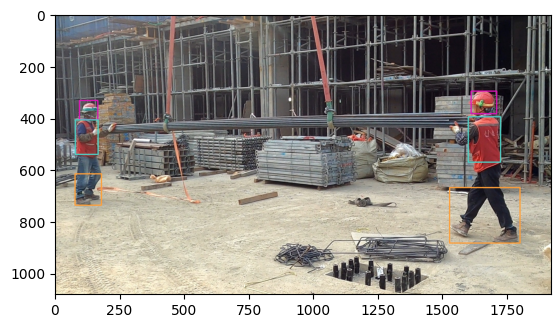

[903, 795, 955, 859]
[1756, 744, 1852, 896]
[368, 542, 690, 1006]
[1511, 395, 1787, 893]
[1258, 624, 1387, 907]


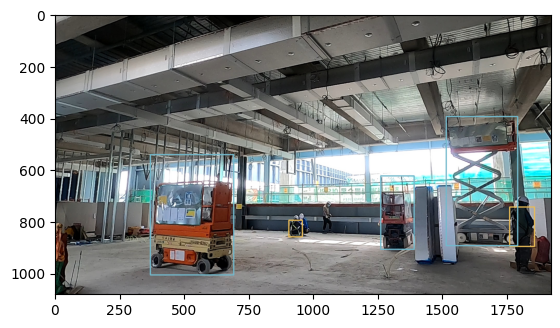

[949, 487, 1148, 676]
[998, 374, 1082, 476]
[791, 258, 1329, 1080]
[161, 521, 443, 815]
[2, 539, 174, 815]


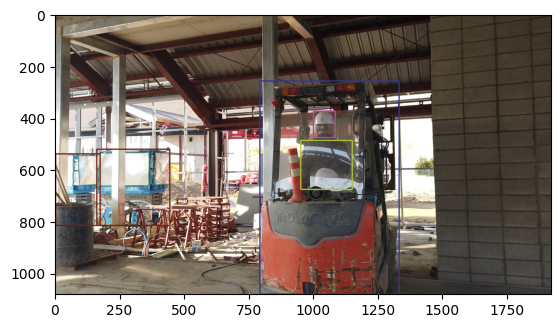

[26, 649, 399, 926]
[411, 680, 520, 845]


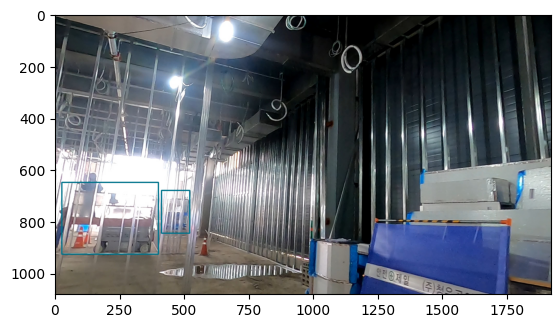

[1268, 253, 1378, 379]
[1112, 382, 1510, 750]
[1547, 330, 1629, 426]
[1492, 427, 1707, 682]
[1558, 751, 1629, 929]


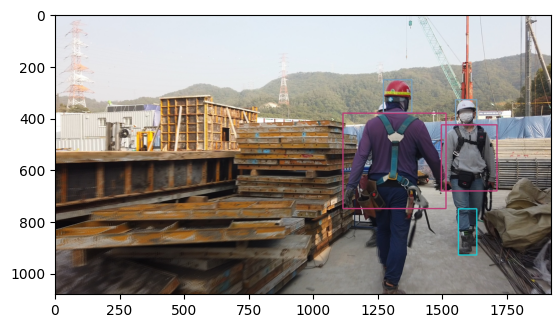

[993, 425, 1087, 484]


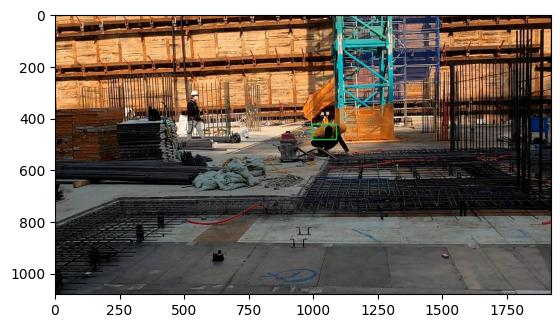

In [22]:
# IMAGE CHECK for json_format
for i,js_f in enumerate(jsons):
    
    img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('/2.중장비만','').replace('/1.안전보호구만','').replace('.json','.jpg')

    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with open(js_f,"r") as f:
        data = json.load(f)
    annos = data['annotations']
    img_size = data['image']['resolution']
    clses = []
    colors = {}


    for anno in annos:
        
        # if anno['class'] not in ['01','02','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']:
        #     continue
        if int(anno['class']) > 19:
            continue
        
        cls = anno['class']
        if cls not in clses:
            clses.append(cls)
            colors[cls] = tuple([random.randint(0,255) for _ in range(3)])
        try:
            xyxy = anno['box'] 
        except:
            continue
        
        
        # print(anno['class'])
        print(anno['box'])

        # print(img_size)
        # print(colors)
        # print( colors[cls])
        # box 
        img = cv2.rectangle(img , pt1=(xyxy[0],xyxy[1]),pt2=(xyxy[2],xyxy[3]),color= colors[cls], thickness=3)

    plt.imshow(img)
    plt.show()
    if i == 5:
        break



In [44]:
# cls 


오브젝트 : 안전모 착용 여부, 안전조끼 착용 여부, 안전벨트 착용 여부

cls  

0. 안전모 착용
1. 안전모 미착용
2. 안전조끼 착용
3. 안전벨트 착용
4. 조끼 & 벨트 미착용


In [87]:
jsons[1]

'../../datasets/aihub_safety/train/[라벨]1.공동주택/서대문/5.전체/S2-N1901M00003.json'

In [91]:
# JSON TO TXT (& xyxy to xywh)
js_cls = ['01','02','07','08']
txt_cls = ['3','4','0','1']

mapping_cls = {js_cls[i]:txt_cls[i] for i in range(len(js_cls))}

def cvt_yoloformat(xyxy,w,h):
    box_w = xyxy[2] - xyxy[0]
    box_h = xyxy[3] - xyxy[1]
    return [(xyxy[0] + box_w/2)/w ,(xyxy[1] + box_h/2)/h, box_w/w, box_h/h ]

count = 0
for j,js_f in enumerate(jsons):
    # print(js_f)
    try:
        with open(js_f,"r") as f:
            data = json.load(f)
    except:
        with open(js_f,"r",encoding='utf-8-sig') as f:
            data = json.load(f)
        
    
    annos = data['annotations']
    print(js_f)
    
    
    clses = []
    txt_clses = []
    boxes = []
    
    # img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('.json','.jpg').replace('/1.안전보호구만','')
    img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('.json','.jpg').replace('공동주택','공동주택_서대문').replace('/서대문','')

    img = Image.open(img_f)

    for anno in annos:
        
        if anno['class'] not in ['01','02','07','08']:
            continue
        cls = anno['class']
        clses.append(cls)

        xyxy = anno['box']
        xywh = cvt_yoloformat(xyxy,img.size[0],img.size[1])
        boxes.append(xywh)

    
    txt_cls = [mapping_cls[j] for j in clses]

    if len(set(clses) & set(['01','02','07','08'])) == 0:
        # print(set(clses))
        continue
    count += 1
    txt_f = '/mnt/ssd2/tekim/datasets/aihub_safety/labels/' + os.path.basename(js_f)[:-4] + 'txt'

    with open(txt_f, 'w') as f:
        for i in range(len(txt_cls)):
            f.write(txt_cls[i] + ' ' + str(boxes[i][0])+ ' '+ str(boxes[i][1]) + ' '+ str(boxes[i][2]) + ' '+ str(boxes[i][3]) + '\n' )

    des_dir = '/mnt/ssd2/tekim/datasets/aihub_safety/images/'
    shutil.copy(img_f, des_dir)

    if j % 100 == 0:
        print(j,', ', count)

../../datasets/aihub_safety/train/[라벨]1.공동주택/서대문/5.전체/S2-N1901M00002.json
0 ,  1
../../datasets/aihub_safety/train/[원천]1.공동주택_서대문/S2-N1901M00002.jpg
0


In [9]:
jsons = glob('/mnt/ssd2/tekim/datasets/aihub_safety/labels/*')
print(jsons[0])
with open(jsons[4] , 'r')as f:
    data = f.readlines()
data

/mnt/ssd2/tekim/datasets/aihub_safety/labels/S2-N0106M00086.txt


['0 0.3416666666666667 0.5476851851851852 0.03958333333333333 0.06018518518518518\n',
 '4 0.34817708333333336 0.6555555555555556 0.0640625 0.1574074074074074\n',
 '4 0.42473958333333334 0.47175925925925927 0.06822916666666666 0.08981481481481482\n',
 '0 0.40677083333333336 0.4134259259259259 0.023958333333333335 0.05277777777777778\n',
 '4 0.6130208333333333 0.6578703703703703 0.051041666666666666 0.08796296296296297\n',
 '0 0.7049479166666667 0.5486111111111112 0.0359375 0.06759259259259259\n',
 '4 0.7098958333333333 0.6814814814814815 0.07291666666666667 0.16111111111111112\n']